In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import us
from numpy import where

In [52]:
# Reading in New York Times mask use by county data.
mask = pd.read_csv('./data/mask-use-by-county.csv')

In [53]:
mask.head()
mask['STCOUNTYFP'] = mask['COUNTYFP']

In [54]:
# reading in fips data set. `us` module would have done the trick if I had found it earlier!
fips = pd.read_csv('./data/ZIP-COUNTY-FIPS_2018-03.csv')

In [55]:
fips.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [56]:
mask.shape

(3142, 7)

In [57]:
# Selecting columns that we need to convert FIPs into county names
fips_dict = fips[['STCOUNTYFP', 'STATE', 'COUNTYNAME']]

In [58]:
# Getting rid of extraneous lines
fips_dict.drop_duplicates(inplace=True)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
fips_dict['STATE'].value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
PR     78
OK     77
AR     75
WI     72
PA     67
FL     67
AL     67
SD     65
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
AK     28
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      5
DE      3
VI      3
DC      1
GU      1
Name: STATE, dtype: int64

In [60]:
# Merging masks with fips to id counties
counties = pd.merge(mask, fips_dict, on='STCOUNTYFP')

In [61]:
counties.drop('STCOUNTYFP', inplace=True, axis=1)

In [62]:
counties.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,STATE,COUNTYNAME
0,1001,0.053,0.074,0.134,0.295,0.444,AL,Autauga County
1,1003,0.083,0.059,0.098,0.323,0.436,AL,Baldwin County
2,1005,0.067,0.121,0.120,0.201,0.491,AL,Barbour County
3,1007,0.020,0.034,0.096,0.278,0.572,AL,Bibb County
4,1009,0.053,0.114,0.180,0.194,0.459,AL,Blount County


In [63]:
# Saving county dataframe as county.csv
counties.to_csv('./data/county.csv')

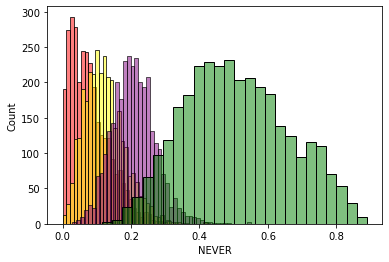

In [64]:
# Quick EDA of distributions
sns.histplot(counties['NEVER'], color='red', alpha=.5);
sns.histplot(counties['SOMETIMES'], color='yellow', alpha=.5)
sns.histplot(counties['FREQUENTLY'], color='purple', alpha=.5)
sns.histplot(counties['ALWAYS'], color='green', alpha=.5);

**States with the highest NEVER mask score**

In [65]:
counties.groupby('STATE').mean().sort_values('NEVER', ascending=False).head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
STATE,,,,,,
ND,38053.000000,0.180981,0.164019,0.145925,0.251811,0.257245
WY,56023.000000,0.151609,0.157000,0.123000,0.232000,0.336435
MT,30056.000000,0.150857,0.171589,0.144893,0.215143,0.317536
SD,46067.430769,0.148292,0.105523,0.167108,0.218138,0.361031
MO,29117.713043,0.134061,0.127165,0.151652,0.210539,0.376557
NE,31093.000000,0.123806,0.117710,0.145753,0.261312,0.351452
KS,20105.000000,0.116886,0.116943,0.151114,0.219467,0.395590
TN,47095.000000,0.110042,0.101358,0.151958,0.209526,0.427189
IA,19099.000000,0.104323,0.117323,0.167424,0.214707,0.396202


In [66]:
# Adding two columns: mask_negative and mask_positive. Gathering positive and negative sentiment.
counties['mask_negative'] = counties['NEVER'] + counties['RARELY']
counties['mask_positive'] = counties['FREQUENTLY'] + counties['ALWAYS']

**Top 10 Mask Negative States**

In [67]:
counties.groupby('STATE').mean().sort_values('mask_negative', ascending=False).head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive
STATE,,,,,,,,
ND,38053.000000,0.180981,0.164019,0.145925,0.251811,0.257245,0.345000,0.509057
MT,30056.000000,0.150857,0.171589,0.144893,0.215143,0.317536,0.322446,0.532679
WY,56023.000000,0.151609,0.157000,0.123000,0.232000,0.336435,0.308609,0.568435
MO,29117.713043,0.134061,0.127165,0.151652,0.210539,0.376557,0.261226,0.587096
SD,46067.430769,0.148292,0.105523,0.167108,0.218138,0.361031,0.253815,0.579169
ID,16044.000000,0.103773,0.144795,0.144773,0.219841,0.386841,0.248568,0.606682
NE,31093.000000,0.123806,0.117710,0.145753,0.261312,0.351452,0.241516,0.612763
KS,20105.000000,0.116886,0.116943,0.151114,0.219467,0.395590,0.233829,0.615057
MN,27087.000000,0.103195,0.122333,0.155701,0.243126,0.375529,0.225529,0.618655


**Top 10 Mask Positive States**

In [68]:
counties.groupby('STATE').mean().sort_values('mask_positive', ascending=False).head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive
STATE,,,,,,,,
RI,44005.000000,0.012200,0.009600,0.040000,0.136000,0.802000,0.021800,0.938000
HI,15005.000000,0.016200,0.018800,0.033400,0.116600,0.815000,0.035000,0.931600
MA,25014.000000,0.019500,0.011786,0.040143,0.131143,0.797286,0.031286,0.928429
DE,10003.000000,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333
DC,11001.000000,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000
NJ,34021.000000,0.022905,0.021238,0.049429,0.157905,0.748429,0.044143,0.906333
CT,9008.000000,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875
NY,36062.000000,0.022839,0.022452,0.049387,0.135274,0.769935,0.045290,0.905210
MD,24044.958333,0.022917,0.020917,0.051542,0.161833,0.742750,0.043833,0.904583


**Creating a state DataFrame to work with**

In [69]:
state = counties.groupby('STATE').mean()
state = state.drop(columns=['COUNTYFP'])

In [74]:
state.drop('index', axis=1)

,STATE,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241
5,CO,0.039156,0.071937,0.097266,0.244328,0.547437,0.111094,0.791766
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333
9,FL,0.055254,0.057522,0.110343,0.194299,0.582552,0.112776,0.776851


In [ ]:
# Saving the state DataFrame as state.csv
state.to_csv('./data/state.csv')

In [27]:
# Found good data on the 2016 election
election = pd.read_csv('./data/2016election.csv')

I was thinking that we could add this data to our mask data by state. Then we could perform analysis regarding mask sentiment and whether the state is left or right leaning. We can also explore whether a state has negative mask sentiment if they have a relatively low population. https://worldpopulationreview.com/state-rankings/2016-election-results-by-state

In [75]:
election.head(2)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,Alabama,729547,34.36,1318255,62.08,0,9,4908620
1,Alaska,116454,36.55,163387,51.28,0,3,734002


Found a cool module called 'us'. Check it out: https://github.com/unitedstates/python-us

In [81]:
# Creating a variable containing a dictionary {'state_name': 'state_abbr'}
name_abr_map = us.states.mapping('name', 'abbr')

In [80]:
election.head(2)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,Alabama,729547,34.36,1318255,62.08,0,9,4908620
1,Alaska,116454,36.55,163387,51.28,0,3,734002


In [87]:
# Should have used .map DOH! Still works
election['State'] = election['State'].apply(lambda x: name_abr_map.get(x))

In [88]:
# Missing DC @ ix 8
election.head(10)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,AL,729547,34.36,1318255,62.08,0,9,4908620
1,AK,116454,36.55,163387,51.28,0,3,734002
2,AZ,1161167,45.13,1252401,48.67,0,11,7378490
3,AR,380494,33.65,684872,60.57,0,6,3039000
4,CA,8753788,61.73,4483810,31.62,55,0,39937500
5,CO,1338870,48.16,1202484,43.25,9,0,5845530
6,CT,897572,54.57,673215,40.93,7,0,3563080
7,DE,235603,53.09,185127,41.72,3,0,982895
8,None,282830,90.48,12723,4.07,3,0,720687
9,FL,4504975,47.82,4617886,49.02,0,29,21993000


In [92]:
# Fixing the None value
election.loc[8, 'State'] = 'DC'

In [96]:
# Merging the two dataframes
state_mask_election = pd.merge(state, election, left_on='STATE', right_on='State')

In [98]:
# Dropping redundant columns
state_mask_election = state_mask_election.drop(columns=['index', 'State'])

In [99]:
# Checking
state_mask_election.head()

,STATE,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,684872,60.57,0,6,3039000
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,1252401,48.67,0,11,7378490
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,4483810,31.62,55,0,39937500


In [103]:
# Creating blue and red column. 
state_mask_election['blue'] = where(state_mask_election['electoralDem'] > 0, 1, 0)
state_mask_election['red'] = where(state_mask_election['electoralRep'] > 0, 1, 0)

In [104]:
state_mask_election.head(2)

,STATE,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop,blue,red
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002,0,1
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620,0,1


In [105]:
# Saving the new state_mask_election DataFrame as sme.csv 
state_mask_election.to_csv('./data/sme.csv')

I felt sme was easier to type although it is not descriptive. Let me know if you want it more descriptive. 

In [108]:
pd.read_csv('./data/sme.csv', index_col=0)

,STATE,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop,blue,red
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002,0,1
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620,0,1
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,684872,60.57,0,6,3039000,0,1
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,1252401,48.67,0,11,7378490,0,1
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,4483810,31.62,55,0,39937500,1,0
5,CO,0.039156,0.071937,0.097266,0.244328,0.547437,0.111094,0.791766,1338870,48.16,1202484,43.25,9,0,5845530,1,0
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875,897572,54.57,673215,40.93,7,0,3563080,1,0
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000,282830,90.48,12723,4.07,3,0,720687,1,0
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333,235603,53.09,185127,41.72,3,0,982895,1,0
9,FL,0.055254,0.057522,0.110343,0.194299,0.582552,0.112776,0.776851,4504975,47.82,4617886,49.02,0,29,21993000,0,1


In [17]:
df = pd.read_csv('../vivian_fork/combined_political_covid_percent.csv', index_col=0)

In [89]:
df.head(10)

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889
5,CO,0.039156,0.071937,0.097266,0.244328,0.547437,0.111094,0.791766,1338870,48.16,...,43.25,9,0,5845530,1,0,256,25106,0.150854,0.760511
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875,897572,54.57,...,40.93,7,0,3563080,1,0,142,6434,0.032840,0.138152
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000,282830,90.48,...,4.07,3,0,720687,1,0,54,3684,0.188605,0.523458
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333,235603,53.09,...,41.72,3,0,982895,1,0,96,6025,0.097649,0.355427
9,FL,0.055254,0.057522,0.110343,0.194299,0.582552,0.112776,0.776851,4504975,47.82,...,49.02,0,29,21993000,0,1,7824,472043,2.204565,2.969029


In [93]:
def population_scale(df):
    columns=['never', 'rarely', 'sometimes', 'frequently', 'always']
    for column in columns:
        df[f'{column}_count'] = df[column] * df['pop']
        

In [94]:
population_scale(df)

In [95]:
df

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,red,deaths,cases,percent change deaths,percent change cases,never_count,rarely_count,sometimes_count,frequently_count,always_count
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,1,24,4935,1.263374,2.275397,3.921668e+04,4.744799e+04,6.813111e+04,2.395730e+05,3.395284e+05
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,1,1228,88654,2.000000,4.203578,4.003822e+05,3.980378e+05,7.196623e+05,1.057038e+06,2.333133e+06
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,1,537,40300,1.924681,1.404875,2.763059e+05,2.651629e+05,4.204760e+05,6.704844e+05,1.406652e+06
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,1,3322,118223,1.938628,1.901212,3.664650e+05,3.925357e+05,6.984971e+05,1.087098e+06,4.832911e+06
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,0,6981,476864,1.131809,1.988889,1.290394e+06,1.227045e+06,2.543606e+06,6.334225e+06,2.854085e+07
5,CO,0.039156,0.071937,0.097266,0.244328,0.547437,0.111094,0.791766,1338870,48.16,...,0,256,25106,0.150854,0.760511,2.288890e+05,4.205128e+05,5.685691e+05,1.428227e+06,3.200062e+06
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875,897572,54.57,...,0,142,6434,0.032840,0.138152,6.235390e+04,8.195084e+04,1.910702e+05,4.502842e+05,2.777421e+06
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000,282830,90.48,...,0,54,3684,0.188605,0.523458,8.648244e+03,9.368931e+03,4.972740e+04,1.181927e+05,5.354704e+05
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333,235603,53.09,...,0,96,6025,0.097649,0.355427,1.900264e+04,6.552633e+03,5.962896e+04,9.403029e+04,8.036805e+05
9,FL,0.055254,0.057522,0.110343,0.194299,0.582552,0.112776,0.776851,4504975,47.82,...,1,7824,472043,2.204565,2.969029,1.215195e+06,1.265090e+06,2.426780e+06,4.273207e+06,1.281207e+07


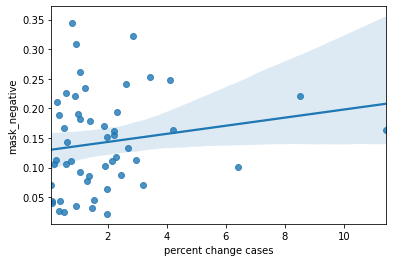

In [33]:
sns.regplot(data = df, x='percent change cases', y='mask_negative');

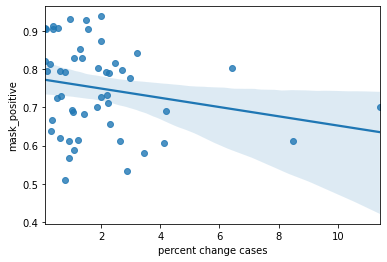

In [34]:
sns.regplot(data = df, x='percent change cases', y='mask_positive');

<AxesSubplot:xlabel='percent change cases', ylabel='pop'>

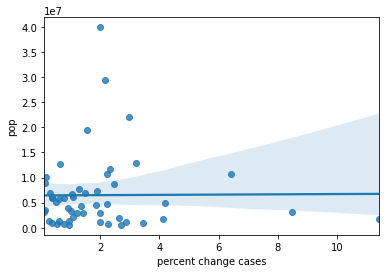

In [35]:
sns.regplot(data = df, x='percent change cases', y='pop')

In [36]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [116]:
X = df[['never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases']]

y = df['percent change cases']

<AxesSubplot:xlabel='mask_negative', ylabel='percr'>

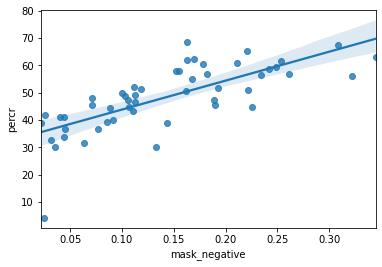

In [42]:
sns.regplot(data=df, x='mask_negative', y='percr')

In [40]:
df[(df['mask_negative'] < .05) & (df['percr'] < 10)]

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases


<AxesSubplot:xlabel='mask_positive', ylabel='percd'>

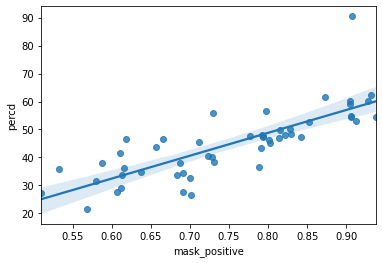

In [39]:
sns.regplot(data=df, x='mask_positive', y='percd')

In [105]:
from sklearn.linear_model import LinearRegression

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [106]:
lr = LinearRegression()
ridge = Ridge()
ss = StandardScaler()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15)

In [108]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [109]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [110]:
ridge.score(X_test_scaled, y_test)

0.0013949768823303677

In [58]:
ols = OLS(y, X).fit()
print(ols.summary())

                                  OLS Regression Results                                 
Dep. Variable:     percent change cases   R-squared (uncentered):                   0.555
Model:                              OLS   Adj. R-squared (uncentered):              0.418
Method:                   Least Squares   F-statistic:                              4.055
Date:                  Thu, 15 Oct 2020   Prob (F-statistic):                    0.000427
Time:                          17:47:27   Log-Likelihood:                         -104.48
No. Observations:                    51   AIC:                                      233.0
Df Residuals:                        39   BIC:                                      256.1
Df Model:                            12                                                  
Covariance Type:              nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [59]:
df['percent change cases'].mean()

1.9172837762144603

In [113]:
X = df['never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases']
y = df['percent change cases']

KeyError: ('never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases')

In [135]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
import numpy as np
from keras.optimizers import Adam


In [126]:
X_arr = X.to_numpy()
X_arr.shape

(51, 12)

In [137]:
model = Sequential()
model.add(Dense(64, input_shape=(X_arr.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


In [138]:
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics=['mae']
          )

In [139]:
history = model.fit(X_arr, y,
                    validation_split=.15,
                    batch_size=16,
                    epochs=100
)

Epoch 1/100
3/3 [==============================] - 0s 36ms/step - loss: 5.4229 - mae: 1.6170 - val_loss: 18.9676 - val_mae: 2.7134
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 3.9579 - mae: 1.3276 - val_loss: 20.0610 - val_mae: 2.8373
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 3.5722 - mae: 1.2847 - val_loss: 24.3337 - val_mae: 3.3231
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 3.4980 - mae: 1.2032 - val_loss: 29.7445 - val_mae: 3.7317
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 3.0607 - mae: 1.2575 - val_loss: 31.2284 - val_mae: 3.7725
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 2.9199 - mae: 1.0926 - val_loss: 30.4345 - val_mae: 3.6614
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 2.8376 - mae: 1.1581 - val_loss: 27.8641 - val_mae: 3.4299
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 3.2854 - mae: 1.23

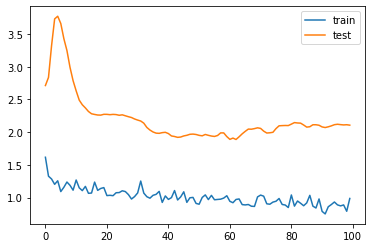

In [143]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend();

In [144]:
model.predict(1)

IndexError: list index out of range